# Cheryl Bai Sleep Inference

## Importing Data and Data Cleaning

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [2]:
# import chrome search history data from personal account and turn into dataframe
chrome_history_CB_personal = pd.read_json("CB_data/history_personal.json")
chrome_history_CB_personal.head()

,id,isLocal,referringVisitId,transition,visitId,visitTime,title,lastVisitTime,typedCount,url,visitCount
0,16741,True,0,link,46198,1.739468e+12,Export Chrome History - Chrome Web Store,1.739468e+12,0,https://chromewebstore.google.com/detail/expor...,2
1,16741,True,46196,link,46197,1.739468e+12,Export Chrome History - Chrome Web Store,1.739468e+12,0,https://chromewebstore.google.com/detail/expor...,2
2,16737,True,0,link,46193,1.739468e+12,how to export chrome browser history - Google ...,1.739468e+12,0,https://www.google.com/search?q=how+to+export+...,3
3,16737,True,0,link,46192,1.739468e+12,how to export chrome browser history - Google ...,1.739468e+12,0,https://www.google.com/search?q=how+to+export+...,3
4,16737,True,0,generated,46191,1.739468e+12,how to export chrome browser history - Google ...,1.739468e+12,0,https://www.google.com/search?q=how+to+export+...,3


In [3]:
# convert the last visit time to human readable time
chrome_history_CB_personal["visitTime"] = chrome_history_CB_personal["visitTime"] / 1000
chrome_history_CB_personal["visitTime"] = pd.to_datetime(chrome_history_CB_personal["visitTime"], unit="s")
chrome_history_CB_personal.head()

,id,isLocal,referringVisitId,transition,visitId,visitTime,title,lastVisitTime,typedCount,url,visitCount
0,16741,True,0,link,46198,2025-02-13 17:35:22.919519901,Export Chrome History - Chrome Web Store,1.739468e+12,0,https://chromewebstore.google.com/detail/expor...,2
1,16741,True,46196,link,46197,2025-02-13 17:35:22.265860081,Export Chrome History - Chrome Web Store,1.739468e+12,0,https://chromewebstore.google.com/detail/expor...,2
2,16737,True,0,link,46193,2025-02-13 17:35:16.480273008,how to export chrome browser history - Google ...,1.739468e+12,0,https://www.google.com/search?q=how+to+export+...,3
3,16737,True,0,link,46192,2025-02-13 17:35:15.968783855,how to export chrome browser history - Google ...,1.739468e+12,0,https://www.google.com/search?q=how+to+export+...,3
4,16737,True,0,generated,46191,2025-02-13 17:35:15.540853024,how to export chrome browser history - Google ...,1.739468e+12,0,https://www.google.com/search?q=how+to+export+...,3


In [4]:
# import chrome search history data from uva account and turn into dataframe
chrome_history_CB_uva = pd.read_csv("CB_data/visits_uva.csv")
chrome_history_CB_uva.head()

,id,url,visit_time,from_visit,transition,segment_id,visit_duration,incremented_omnibox_typed_score,opener_visit,originator_cache_guid,originator_visit_id,originator_from_visit,originator_opener_visit,is_known_to_sync,consider_for_ntp_most_visited,external_referrer_url,visited_link_id,app_id,visit_time_formatted
0,424475,117331,13376199127105962,0,838860805,0,1848975,0,0,NaN,0,0,0,0,1,NaN,0,NaN,2024-11-16 02:52:07
1,424476,117332,13376199128951155,424475,268435456,0,0,0,0,NaN,0,0,0,0,1,NaN,31787,NaN,2024-11-16 02:52:08
2,424477,117333,13376199128951155,424476,-2147483648,0,0,0,0,NaN,0,0,0,0,1,NaN,31788,NaN,2024-11-16 02:52:08
3,424478,117334,13376199128951155,424477,-1610612736,0,9142189,0,0,NaN,0,0,0,0,1,NaN,31789,NaN,2024-11-16 02:52:08
4,424479,110130,13376199138091016,424478,805306368,0,3148338,0,0,NaN,0,0,0,0,1,NaN,31790,NaN,2024-11-16 02:52:18


In [5]:
# get urls from chrome search history data and merge into dataframe
urls_CB_uva = pd.read_csv("CB_data/urls_uva.csv")
chrome_history_CB_uva = pd.merge(chrome_history_CB_uva, urls_CB_uva, left_on="url", right_on="id", how="inner")
chrome_history_CB_uva.head()

,id_x,url_x,visit_time,from_visit,transition,segment_id,visit_duration,incremented_omnibox_typed_score,opener_visit,originator_cache_guid,...,visited_link_id,app_id,visit_time_formatted,id_y,url_y,title,visit_count,typed_count,last_visit_time,hidden
0,424475,117331,13376199127105962,0,838860805,0,1848975,0,0,NaN,...,0,NaN,2024-11-16 02:52:07,117331,https://www.google.com/search?q=lululemon+like...,lululemon like new - Google Search,1,0,13376199127105962,0
1,424476,117332,13376199128951155,424475,268435456,0,0,0,0,NaN,...,31787,NaN,2024-11-16 02:52:08,117332,https://www.google.com/aclk?sa=l&ai=DChcSEwilr...,lululemon Like New | Gently used gear for resale,1,0,13376199128951155,0
2,424477,117333,13376199128951155,424476,-2147483648,0,0,0,0,NaN,...,31788,NaN,2024-11-16 02:52:08,117333,https://www.googleadservices.com/pagead/aclk?s...,lululemon Like New | Gently used gear for resale,1,0,13376199128951155,0
3,424478,117334,13376199128951155,424477,-1610612736,0,9142189,0,0,NaN,...,31789,NaN,2024-11-16 02:52:08,117334,https://likenew.lululemon.com/?CID=Google_PPC_...,lululemon Like New | Gently used gear for resale,1,0,13376199128951155,0
4,424479,110130,13376199138091016,424478,805306368,0,3148338,0,0,NaN,...,31790,NaN,2024-11-16 02:52:18,110130,https://likenew.lululemon.com/search?q=define,"Search: 2 for ""define""",5,0,13381990561287716,0


In [6]:
# THIS CODE IS NO LONGER NEEDED BECAUSE OF USING THE VISITS TABLE WHICH ALREADY HAS THE VISIT TIME FORMATTED

# convert the last visit time to human readable time
# this data was saved in webkit/chrome format which is different from how the other chrome profile exported timestamps
# def date_from_webkit(webkit_timestamp):
#     epoch_start = datetime(1601,1,1)
#     delta = timedelta(microseconds=int(webkit_timestamp))
#     return epoch_start + delta

# chrome_history_CB_uva["visit_time"] = chrome_history_CB_uva["visit_time"].apply(date_from_webkit)
# chrome_history_CB_uva.head()

In [7]:
# select relevant columns and combine the dataframes
chrome_history_CB_personal = chrome_history_CB_personal[["url", "visitCount", "typedCount", "title", "visitTime"]]
chrome_history_CB_uva = chrome_history_CB_uva[["url_y", "visit_count", "typed_count", "title", "visit_time_formatted"]]
chrome_history_CB_personal = chrome_history_CB_personal.rename(columns={"typedCount" : "typed_count", "visitCount": "visit_count", "visitTime": "visit_time"})
chrome_history_CB_uva = chrome_history_CB_uva.rename(columns={"url_y" : "url", "visit_time_formatted": "visit_time"})
chrome_history_CB = pd.concat([chrome_history_CB_uva, chrome_history_CB_personal])

# split date and time
chrome_history_CB["visit_time"] = pd.to_datetime(chrome_history_CB["visit_time"])

# Extract date and time into separate columns
chrome_history_CB["visit_date"] = chrome_history_CB["visit_time"].dt.date
chrome_history_CB["visit_time"] = chrome_history_CB["visit_time"].dt.strftime("%H:%M:%S")

print("Number of entries: ", len(chrome_history_CB))
chrome_history_CB.head()

Number of entries:  32733


,url,visit_count,typed_count,title,visit_time,visit_date
0,https://www.google.com/search?q=lululemon+like...,1,0,lululemon like new - Google Search,02:52:07,2024-11-16
1,https://www.google.com/aclk?sa=l&ai=DChcSEwilr...,1,0,lululemon Like New | Gently used gear for resale,02:52:08,2024-11-16
2,https://www.googleadservices.com/pagead/aclk?s...,1,0,lululemon Like New | Gently used gear for resale,02:52:08,2024-11-16
3,https://likenew.lululemon.com/?CID=Google_PPC_...,1,0,lululemon Like New | Gently used gear for resale,02:52:08,2024-11-16
4,https://likenew.lululemon.com/search?q=define,5,0,"Search: 2 for ""define""",02:52:18,2024-11-16


In [8]:
# sort chrome history visits by date and time
def sort_by_date_time(df):
    # Sort DataFrame by visit_date and visit_time
    df_sorted = df.sort_values(by=["visit_date", "visit_time"]).reset_index(drop=True)

    return df_sorted

chrome_history_CB = sort_by_date_time(chrome_history_CB)
chrome_history_CB.tail(100)

,url,visit_count,typed_count,title,visit_time,visit_date
32633,https://shibidp.its.virginia.edu/idp/profile/S...,191,0,NetBadge Message - Saving Session Information...,23:55:29,2025-02-13
32634,https://shibidp.its.virginia.edu/idp/profile/S...,191,0,NetBadge Message - Saving Session Information...,23:55:29,2025-02-13
32635,https://www.google.com/a/virginia.edu/acs,9,0,Redirecting...,23:55:29,2025-02-13
32636,https://accounts.google.com/a/virginia.edu/acs,9,0,Redirecting...,23:55:29,2025-02-13
32637,https://accounts.google.com/signin/continue?sa...,1,0,NaN,23:55:29,2025-02-13
...,...,...,...,...,...,...
32728,https://www.google.com/search?q=DB+Browser+for...,3,0,DB Browser for SQLite - Google Search,00:21:43,2025-02-14
32729,https://www.google.com/search?q=DB+Browser+for...,3,0,DB Browser for SQLite - Google Search,00:21:43,2025-02-14
32730,https://www.google.com/search?q=DB+Browser+for...,3,0,DB Browser for SQLite - Google Search,00:21:44,2025-02-14
32731,https://sqlitebrowser.org/,1,0,DB Browser for SQLite,00:21:44,2025-02-14


In [9]:
# view apple watch sleep data as a dataframe
sleep_CB = pd.read_csv("cheryl_sleep_data.csv")
sleep_CB["Date"] = pd.to_datetime(sleep_CB["Date"])
sleep_CB.tail()

,Unnamed: 0,Date,total_sleep_hours,sleep_start,sleep_end
778,778,2025-02-13,8.241667,2025-02-13 01:18:33-05:00,2025-02-13 09:33:33-05:00
779,779,2025-02-14,5.233333,2025-02-14 00:58:44-05:00,2025-02-14 06:25:14-05:00
780,780,2025-02-15,7.575000,2025-02-14 23:41:46-05:00,2025-02-15 17:14:49-05:00
781,781,2025-02-16,8.016667,2025-02-15 23:03:10-05:00,2025-02-16 14:40:19-05:00
782,782,2025-02-17,7.350000,2025-02-17 01:12:58-05:00,2025-02-17 08:39:28-05:00


## Sleep Inference

In [10]:
# get the first and last visited websites per date

def get_first_and_last_visits(df):
    # find first and last visited websites per date
    first_visits = df.loc[df.groupby("visit_date")["visit_time"].idxmin()]
    last_visits = df.loc[df.groupby("visit_date")["visit_time"].idxmax()]

    # select relevant columns
    first_visits = first_visits[["visit_date", "visit_time", "url", "title"]].rename(columns={
        "visit_time": "visit_time_first",
        "url": "url_first",
        "title": "title_first"
    })
    
    last_visits = last_visits[["visit_date", "visit_time", "url", "title"]].rename(columns={
        "visit_time": "visit_time_last",
        "url": "url_last",
        "title": "title_last"
    })

    # merge both DataFrames on visit_date to get one row per date
    visit_summary = pd.merge(first_visits, last_visits, on="visit_date")
    return visit_summary

visit_summary_df = get_first_and_last_visits(chrome_history_CB)
visit_summary_df.tail()

,visit_date,visit_time_first,url_first,title_first,visit_time_last,url_last,title_last
71,2025-02-10,03:23:32,https://docs.google.com/presentation/?usp=slid...,Google Slides,23:55:24,https://www.netflix.com/watch/81773841?trackId...,Netflix
72,2025-02-11,01:36:31,https://www.youtube.com/,YouTube,23:49:30,https://chatgpt.com/c/67abe207-6820-800b-99fc-...,Logarithmic Expression Simplification
73,2025-02-12,01:36:19,https://www.google.com/search?q=gmail&rlz=1C1O...,gmail - Google Search,21:34:42,https://www.geeksforgeeks.org/0-1-knapsack-pro...,0/1 Knapsack Problem - GeeksforGeeks
74,2025-02-13,00:49:50,https://www.google.com/search?q=problems+you+c...,problems you can solve in prolog - Google Search,23:57:44,https://support.google.com/accounts/answer/302...,How to download your Google data - Google Acco...
75,2025-02-14,00:13:53,https://www.google.com/search?q=hrome%3A%2F%2F...,chrome://settings/syncSetup - Google Search,00:21:53,https://sqlitebrowser.org/dl/,Downloads - DB Browser for SQLite


In [11]:
print(visit_summary_df["visit_time_first"].dtype)
visit_summary_df["visit_time_last"] = pd.to_datetime(visit_summary_df["visit_time_last"])

object


C:\Users\chery\AppData\Local\Temp\ipykernel_32936\2238163626.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  visit_summary_df["visit_time_last"] = pd.to_datetime(visit_summary_df["visit_time_last"])


In [12]:
# tally up keywords
keywords = ["uva", "canvas", "eqk9vb", "drive"]

tally_data = []
last_time_per_date = {}

for _, row in chrome_history_CB.iterrows():
    row_tally = {"visit_date": row["visit_date"], "total_count": 0}
    
    # Count occurrences of each keyword
    for keyword in keywords:
        count = sum(row.astype(str).str.contains(keyword, case=False, na=False))
        row_tally[keyword] = count
        row_tally["total_count"] += count

    if row["visit_date"] not in last_time_per_date:
        last_time_per_date[row["visit_date"]] = row["visit_time"]
    else:
        if row["visit_time"] > last_time_per_date[row["visit_date"]]:
            last_time_per_date[row["visit_date"]] = row["visit_time"]
    
    tally_data.append(row_tally)

tally_df = pd.DataFrame(tally_data)
summary_df = tally_df.groupby("visit_date", as_index=False).sum()
summary_df["last_time"] = summary_df["visit_date"].map(last_time_per_date)

In [13]:
# double check to see if any dates are missing, if so, add them to my df
summary_df["visit_date"] = pd.to_datetime(summary_df["visit_date"])

full_date_range = pd.date_range(start=summary_df["visit_date"].min(), end=summary_df["visit_date"].max(), freq="D")
missing_dates = full_date_range[~full_date_range.isin(summary_df["visit_date"])]

missing_rows = []
for missing_date in missing_dates:
    missing_row = {"visit_date": missing_date, "total_count": 0, "uva": 0, "canvas": 0, "eqk9vb": 0, "drive": 0}
    missing_rows.append(missing_row)
missing_df = pd.DataFrame(missing_rows)

summary_df = pd.concat([summary_df, missing_df], ignore_index=True)
summary_df = summary_df.sort_values("visit_date").reset_index(drop=True)

summary_df.head()

,visit_date,total_count,uva,canvas,eqk9vb,drive,last_time
0,2024-11-16,0,0,0,0,0,06:24:21
1,2024-11-17,113,63,26,6,18,23:18:40
2,2024-11-18,229,58,87,24,60,23:13:00
3,2024-11-19,126,57,40,6,23,23:44:47
4,2024-11-20,234,49,110,30,45,23:06:47


object


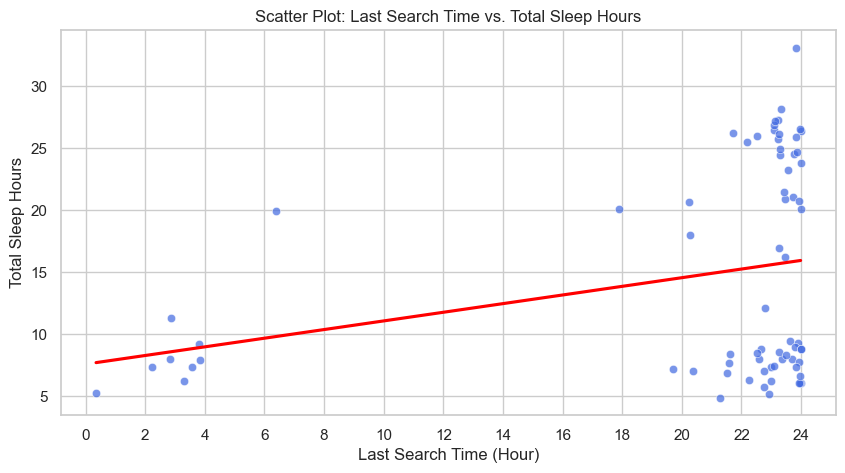

ValueError: bins must increase monotonically.

In [15]:
sns.set_theme(style="whitegrid")

# Convert datetime columns
sleep_CB["Date"] = pd.to_datetime(sleep_CB["Date"])  # Sleep recorded by morning of the date
# visit_summary_df["date"] = pd.to_datetime(visit_summary_df["date"])

print(visit_summary_df["visit_time_first"].dtype)
visit_summary_df["visit_date"] = pd.to_datetime(visit_summary_df["visit_date"])


visit_summary_df["Sleep Date"] = visit_summary_df["visit_date"].where(
    visit_summary_df["visit_time_last"].dt.hour < 4,  # Check if search time is before 4 AM
    visit_summary_df["visit_date"] - pd.Timedelta(days=1)  # Subtract one day if it's after 4 AM
)

# Merge sleep and search data
merged_df = sleep_CB.merge(visit_summary_df, left_on="Date", right_on="Sleep Date", how="left")

# Convert last search time into a numeric hour for plotting
merged_df["search_hour"] = pd.to_datetime(merged_df["visit_time_last"], format="%H:%M:%S").dt.hour + \
                            pd.to_datetime(merged_df["visit_time_last"], format="%H:%M:%S").dt.minute / 60

plt.figure(figsize=(10, 5))
sns.scatterplot(data=merged_df, x="search_hour", y="total_sleep_hours", alpha=0.7, color="royalblue")
sns.regplot(data=merged_df, x="search_hour", y="total_sleep_hours", scatter=False, color="red", ci=None)  # Trendline
plt.xlabel("Last Search Time (Hour)")
plt.ylabel("Total Sleep Hours")
plt.title("Scatter Plot: Last Search Time vs. Total Sleep Hours")
plt.xticks(range(0, 25, 2))  # Show time as hours
plt.show()

merged_df["search_range"] = pd.cut(
    merged_df["search_hour"],
    bins=[0, 22, 24, 2, 12],  # Before 10 PM, 10 PM–12 AM, 12 AM–2 AM, 2 AM–Noon
    labels=["Before 10 PM", "10 PM–12 AM", "12 AM–2 AM", "2 AM–Noon"],
    ordered=True
)

plt.figure(figsize=(8, 5))
sns.boxplot(data=merged_df, x="search_range", y="total_sleep_hours", palette="coolwarm")
sns.stripplot(data=merged_df, x="search_range", y="total_sleep_hours", color="black", alpha=0.3, jitter=True)  # Add individual points
plt.xlabel("Last Search Time Range")
plt.ylabel("Total Sleep Hours")
plt.title("Box Plot: Sleep Duration by Last Search Time Range")
plt.show()

plt.figure(figsize=(8, 5))
sns.violinplot(data=merged_df, x="search_range", y="total_sleep_hours", palette="coolwarm", inner="quartile")
plt.xlabel("Last Search Time Range")
plt.ylabel("Total Sleep Hours")
plt.title("Violin Plot: Sleep Distribution by Last Search Time Range")
plt.show()
